# <center><u>Exploitation des données massives en finance

### <u>1) Importation des données<u>

In [142]:
# Chargement des packages utiles
import requests as rq
from bs4 import BeautifulSoup as bs
import json
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

#### 1.1) Inflation

In [143]:
#importation données CPI

headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

API_KEY = "NOBHHHGB358UPAWJ"

symbol = "CPI"

interval = "monthly"
output_type = "csv"

url = "https://www.alphavantage.co/query?function=CPI&symbol=%s&interval=%s&apikey=%s&datatype=%s&outputsize=full" % (symbol, interval, API_KEY, 
                                                                                                          output_type)

resp = rq.get(url).text

str_io = StringIO(resp)

data_CPI = pd.read_csv(str_io, sep=",")
print (data_CPI)

       timestamp    value
0     2022-12-01  296.797
1     2022-11-01  297.711
2     2022-10-01  298.012
3     2022-09-01  296.808
4     2022-08-01  296.171
...          ...      ...
1315  1913-05-01    9.700
1316  1913-04-01    9.800
1317  1913-03-01    9.800
1318  1913-02-01    9.800
1319  1913-01-01    9.800

[1320 rows x 2 columns]


In [144]:
data_CPI2 = data_CPI.reindex(index=data_CPI.index[::-1])
data_CPI2

,timestamp,value
1319,1913-01-01,9.800
1318,1913-02-01,9.800
1317,1913-03-01,9.800
1316,1913-04-01,9.800
1315,1913-05-01,9.700
...,...,...
4,2022-08-01,296.171
3,2022-09-01,296.808
2,2022-10-01,298.012
1,2022-11-01,297.711


In [145]:
#données inflation

def inf(serie):
    return ((serie-serie.shift())/serie.shift())

data_inflation = pd.DataFrame ({'Time' : data_CPI2['timestamp'], 'Inflation' : inf(data_CPI2['value'])})
data_inflation

,Time,Inflation
1319,1913-01-01,NaN
1318,1913-02-01,0.000000
1317,1913-03-01,0.000000
1316,1913-04-01,0.000000
1315,1913-05-01,-0.010204
...,...,...
4,2022-08-01,-0.000354
3,2022-09-01,0.002151
2,2022-10-01,0.004056
1,2022-11-01,-0.001010


In [146]:
data_inflation2 = data_inflation.reindex(index=data_inflation.index[::-1])
data_inflation2

,Time,Inflation
0,2022-12-01,-0.003070
1,2022-11-01,-0.001010
2,2022-10-01,0.004056
3,2022-09-01,0.002151
4,2022-08-01,-0.000354
...,...,...
1315,1913-05-01,-0.010204
1316,1913-04-01,0.000000
1317,1913-03-01,0.000000
1318,1913-02-01,0.000000


In [147]:
#Définir la plage de données : 01-01-1985 au 01-12-2022

data_inflation2[data_inflation2['Time'] < '1985-01-01']

,Time,Inflation
456,1984-12-01,0.000000
457,1984-11-01,0.000000
458,1984-10-01,0.002857
459,1984-09-01,0.004785
460,1984-08-01,0.003842
...,...,...
1315,1913-05-01,-0.010204
1316,1913-04-01,0.000000
1317,1913-03-01,0.000000
1318,1913-02-01,0.000000


In [148]:
data_inflation2.drop(data_inflation2.index[456:1320], inplace = True)
data_inflation2

,Time,Inflation
0,2022-12-01,-0.003070
1,2022-11-01,-0.001010
2,2022-10-01,0.004056
3,2022-09-01,0.002151
4,2022-08-01,-0.000354
...,...,...
451,1985-05-01,0.003742
452,1985-04-01,0.004699
453,1985-03-01,0.003774
454,1985-02-01,0.004739


#### 1.2) Treasury Yield

In [149]:
#importation données Bonds du Trésor

headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

API_KEY = "NOBHHHGB358UPAWJ"

symbol = "TREASURY_YIELD"

interval = "monthly"
maturity = "2year"
output_type = "csv"

url = "https://www.alphavantage.co/query?function=TREASURY_YIELD&symbol=%s&interval=%s&maturity=%s&apikey=%s&datatype=%s&outputsize=full" % (symbol, interval, maturity, API_KEY, 
                                                                                                          output_type)

resp = rq.get(url).text

str_io = StringIO(resp)

data_TY = pd.read_csv(str_io, sep=",")
print (data_TY)

      timestamp  value
0    2023-01-01   4.21
1    2022-12-01   4.29
2    2022-11-01   4.50
3    2022-10-01   4.38
4    2022-09-01   3.86
..          ...    ...
555  1976-10-01   5.98
556  1976-09-01   6.42
557  1976-08-01   6.63
558  1976-07-01   6.85
559  1976-06-01   7.06

[560 rows x 2 columns]


In [150]:
#Définir la plage de données : 01-01-1985 au 01-12-2022

data_TY[data_TY['timestamp'] < '1985-01-01']

,timestamp,value
457,1984-12-01,10.18
458,1984-11-01,10.65
459,1984-10-01,11.60
460,1984-09-01,12.20
461,1984-08-01,12.43
...,...,...
555,1976-10-01,5.98
556,1976-09-01,6.42
557,1976-08-01,6.63
558,1976-07-01,6.85


In [151]:
data_TY.drop(data_TY.index[456:559], inplace = True)
data_TY

,timestamp,value
0,2023-01-01,4.21
1,2022-12-01,4.29
2,2022-11-01,4.50
3,2022-10-01,4.38
4,2022-09-01,3.86
...,...,...
452,1985-05-01,9.39
453,1985-04-01,10.09
454,1985-03-01,10.71
455,1985-02-01,10.17


In [152]:
#On renomme les colonnes du dataframe

data_TY.columns = ['Time', 'Treasury_Yield']
data_TY

,Time,Treasury_Yield
0,2023-01-01,4.21
1,2022-12-01,4.29
2,2022-11-01,4.50
3,2022-10-01,4.38
4,2022-09-01,3.86
...,...,...
452,1985-05-01,9.39
453,1985-04-01,10.09
454,1985-03-01,10.71
455,1985-02-01,10.17


#### 1.3) Federal Funds Rate

In [153]:
#importation données Federal Funds Rate

headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

API_KEY = "NOBHHHGB358UPAWJ"

symbol = "FEDERAL_FUNDS_RATE"

interval = "monthly"
output_type = "csv"

url = "https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&symbol=%s&interval=%s&apikey=%s&datatype=%s&outputsize=full" % (symbol, interval, API_KEY, 
                                                                                                          output_type)

resp = rq.get(url).text

str_io = StringIO(resp)

data_FF = pd.read_csv(str_io, sep=",")
print (data_FF)

      timestamp  value
0    2023-01-01   4.33
1    2022-12-01   4.10
2    2022-11-01   3.78
3    2022-10-01   3.08
4    2022-09-01   2.56
..          ...    ...
818  1954-11-01   0.83
819  1954-10-01   0.85
820  1954-09-01   1.07
821  1954-08-01   1.22
822  1954-07-01   0.80

[823 rows x 2 columns]


In [154]:
#Définir la plage de données : 01-01-1985 au 01-12-2022

data_FF[data_FF['timestamp'] < '1985-01-01']

,timestamp,value
457,1984-12-01,8.38
458,1984-11-01,9.43
459,1984-10-01,9.99
460,1984-09-01,11.30
461,1984-08-01,11.64
...,...,...
818,1954-11-01,0.83
819,1954-10-01,0.85
820,1954-09-01,1.07
821,1954-08-01,1.22


In [155]:
data_FF.drop(data_FF.index[456:822], inplace = True)
data_FF

,timestamp,value
0,2023-01-01,4.33
1,2022-12-01,4.10
2,2022-11-01,3.78
3,2022-10-01,3.08
4,2022-09-01,2.56
...,...,...
452,1985-05-01,7.97
453,1985-04-01,8.27
454,1985-03-01,8.58
455,1985-02-01,8.50


In [156]:
#On renomme les colonnes du dataframe

data_FF.columns = ['Time', 'Federal_Funds_Rate']
data_FF

,Time,Federal_Funds_Rate
0,2023-01-01,4.33
1,2022-12-01,4.10
2,2022-11-01,3.78
3,2022-10-01,3.08
4,2022-09-01,2.56
...,...,...
452,1985-05-01,7.97
453,1985-04-01,8.27
454,1985-03-01,8.58
455,1985-02-01,8.50


#### 1.4) Indice boursier Apple

In [157]:
#importation données indice boursier Apple

headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "AAPL"
period1 = int(dt.datetime(1981,1,1).timestamp())
period2 = int(dt.datetime(2023,1,1).timestamp())
print(period1, period2)
interval = "1mo" #fréquence mensuelle : 1 month

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)
# premier %s = symbol, deuxième %s = period1, etc.....

full_url = url_base + url_suite
print(full_url)

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)

data_apple = pd.read_csv(str_io, sep=",")

print(data_apple.head())

347151600 1672527600
https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=347151600&period2=1672527600&interval=1mo
         Date      Open      High       Low     Close  Adj Close      Volume
0  1985-01-01  0.130022  0.138951  0.124442  0.129464   0.100742  6366416000
1  1985-02-01  0.129464  0.137277  0.110491  0.110491   0.085978  4733388800
2  1985-03-01  0.110491  0.116071  0.092634  0.098772   0.076859  4615587200
3  1985-04-01  0.098772  0.102679  0.087612  0.094866   0.073820  2868028800
4  1985-05-01  0.094866  0.099330  0.075335  0.077567   0.060359  4639129600


In [158]:
data_apple = data_apple.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
data_apple

,Date,Close
0,1985-01-01,0.129464
1,1985-02-01,0.110491
2,1985-03-01,0.098772
3,1985-04-01,0.094866
4,1985-05-01,0.077567
...,...,...
451,2022-08-01,157.220001
452,2022-09-01,138.199997
453,2022-10-01,153.339996
454,2022-11-01,148.029999


In [159]:
#On renomme les colonnes du dataframe

data_apple.columns = ['Time', 'Apple2']
data_apple

,Time,Apple2
0,1985-01-01,0.129464
1,1985-02-01,0.110491
2,1985-03-01,0.098772
3,1985-04-01,0.094866
4,1985-05-01,0.077567
...,...,...
451,2022-08-01,157.220001
452,2022-09-01,138.199997
453,2022-10-01,153.339996
454,2022-11-01,148.029999


In [160]:
#Transformation de Y (variable continue) en une variable discrète
#Pour cela, on veut que Y prenne la valeur de 0 si son indice a baissé d'un mois à l'autre ; prenne la valeur de 1
#si son indice a augmenté d'un mois à l'autre

def minus(serie):
    return serie-serie.shift()

data_apple1 = pd.DataFrame ({'Time' : data_apple['Time'], 'Apple2' : minus(data_apple['Apple2'])})
data_apple1.head()

,Time,Apple2
0,1985-01-01,NaN
1,1985-02-01,-0.018973
2,1985-03-01,-0.011719
3,1985-04-01,-0.003906
4,1985-05-01,-0.017299


In [161]:
for i in range (0,456,1):
        if data_apple1['Apple2'][i] <= 0 :
            data_apple1['Apple2'][i] = 0
        else :
            data_apple1['Apple2'][i] = 1

In [162]:
data_apple1.columns = ['Time', 'Apple']
data_apple1

,Time,Apple
0,1985-01-01,1.0
1,1985-02-01,0.0
2,1985-03-01,0.0
3,1985-04-01,0.0
4,1985-05-01,0.0
...,...,...
451,2022-08-01,0.0
452,2022-09-01,0.0
453,2022-10-01,1.0
454,2022-11-01,0.0


In [163]:
#'Apple' représente l'indice boursier Apple en variable discrète
#'Apple2' représente l'indice boursier Apple en variable continue

#### 1.5) Indice boursier SP500

In [164]:
#importation données indice boursier SP500

headers = {"User-Agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:81.0) Gecko/20100101 Firefox/81.0"}

url_base = "https://query1.finance.yahoo.com"

# unix timestamp : le nombre de seconde passée de puis le 1 Janvier 1970 00:00:00
symbol = "^GSPC"
period1 = int(dt.datetime(1981,1,1).timestamp())
period2 = int(dt.datetime(2023,1,1).timestamp())
print(period1, period2)
interval = "1mo" #fréquence mensuelle : 1 month

url_suite = "/v7/finance/download/%s?period1=%s&period2=%s&interval=%s" % (symbol, period1, period2, interval)
# premier %s = symbol, deuxième %s = period1, etc.....

full_url = url_base + url_suite
print(full_url)

resp = rq.get(full_url, headers=headers).text

str_io = StringIO(resp)

data_SP500 = pd.read_csv(str_io, sep=",")

print(data_SP500.head())

347151600 1672527600
https://query1.finance.yahoo.com/v7/finance/download/^GSPC?period1=347151600&period2=1672527600&interval=1mo
         Date        Open        High         Low       Close   Adj Close  \
0  1985-01-01  167.199997  180.270004  163.360001  179.630005  179.630005   
1  1985-02-01  179.630005  183.949997  177.750000  181.179993  181.179993   
2  1985-03-01  181.179993  183.889999  176.529999  180.660004  180.660004   
3  1985-04-01  180.660004  183.610001  177.860001  179.830002  179.830002   
4  1985-05-01  179.830002  189.979996  178.350006  189.550003  189.550003   

       Volume  
0  2673710000  
1  2194620000  
2  2153090000  
3  1981880000  
4  2350340000  


In [165]:
data_SP500 = data_SP500.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)
data_SP500

,Date,Close
0,1985-01-01,179.630005
1,1985-02-01,181.179993
2,1985-03-01,180.660004
3,1985-04-01,179.830002
4,1985-05-01,189.550003
...,...,...
451,2022-08-01,3955.000000
452,2022-09-01,3585.620117
453,2022-10-01,3871.979980
454,2022-11-01,4080.110107


In [166]:
#On renomme les colonnes du dataframe

data_SP500.columns = ['Time', 'SP500']
data_SP500

,Time,SP500
0,1985-01-01,179.630005
1,1985-02-01,181.179993
2,1985-03-01,180.660004
3,1985-04-01,179.830002
4,1985-05-01,189.550003
...,...,...
451,2022-08-01,3955.000000
452,2022-09-01,3585.620117
453,2022-10-01,3871.979980
454,2022-11-01,4080.110107


#### 1.6) Dataframe final

In [167]:
#Dataframe final (on rassemble toutes les données en un seul dataframe), avec Y : variable continue

df1 = pd.merge(data_TY, data_FF, on='Time')
df2 = pd.merge(data_inflation2, data_SP500, on='Time')
df3 = pd.merge(df1, df2, on='Time')
df_reg = pd.merge(df3, data_apple, on='Time')
df_reg

,Time,Treasury_Yield,Federal_Funds_Rate,Inflation,SP500,Apple2
0,2022-12-01,4.29,4.10,-0.003070,3839.500000,129.929993
1,2022-11-01,4.50,3.78,-0.001010,4080.110107,148.029999
2,2022-10-01,4.38,3.08,0.004056,3871.979980,153.339996
3,2022-09-01,3.86,2.56,0.002151,3585.620117,138.199997
4,2022-08-01,3.25,2.33,-0.000354,3955.000000,157.220001
...,...,...,...,...,...,...
450,1985-06-01,8.69,7.53,0.002796,191.850006,0.080357
451,1985-05-01,9.39,7.97,0.003742,189.550003,0.077567
452,1985-04-01,10.09,8.27,0.004699,179.830002,0.094866
453,1985-03-01,10.71,8.58,0.003774,180.660004,0.098772


In [168]:
#exporter le dataframe en csv
csv_data_reg = df_reg.to_csv('df_reg.csv', index=True)

In [169]:
#Dataframe final (on rassemble toutes les données en un seul dataframe), avec Y : variable discrète

df_clas = pd.merge(df3, data_apple1, on='Time')
df_clas

,Time,Treasury_Yield,Federal_Funds_Rate,Inflation,SP500,Apple
0,2022-12-01,4.29,4.10,-0.003070,3839.500000,0.0
1,2022-11-01,4.50,3.78,-0.001010,4080.110107,0.0
2,2022-10-01,4.38,3.08,0.004056,3871.979980,1.0
3,2022-09-01,3.86,2.56,0.002151,3585.620117,0.0
4,2022-08-01,3.25,2.33,-0.000354,3955.000000,0.0
...,...,...,...,...,...,...
450,1985-06-01,8.69,7.53,0.002796,191.850006,1.0
451,1985-05-01,9.39,7.97,0.003742,189.550003,0.0
452,1985-04-01,10.09,8.27,0.004699,179.830002,0.0
453,1985-03-01,10.71,8.58,0.003774,180.660004,0.0


In [170]:
#exporter le dataframe en csv
csv_data_clas = df_clas.to_csv('df_clas.csv', index=True)

#### 1.7) Relations entre les variables du Dataframe

In [171]:
#Représentations graphiques des variables du dataframe

<AxesSubplot:title={'center':'FEDERAL_FUNDS_RATE'}>

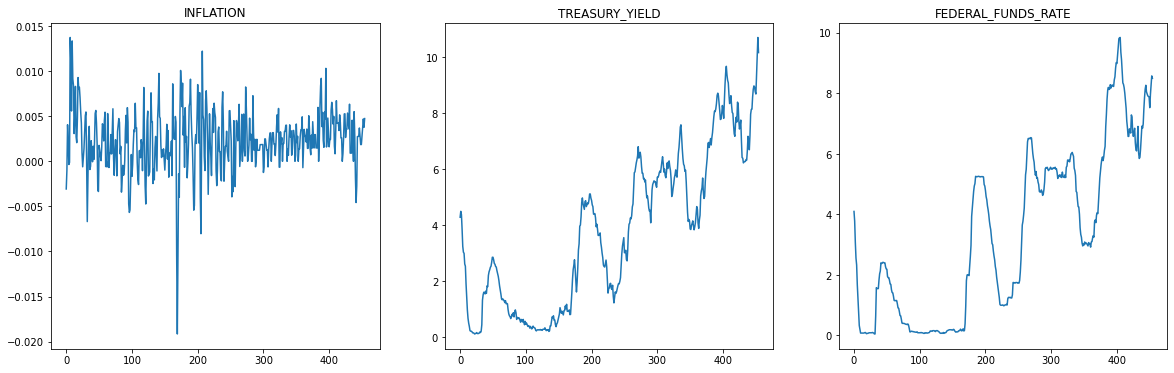

In [172]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plt.title('INFLATION')
graph_inflation = df_reg['Inflation']
fig1 = plt.gcf() #pour exporter la figure par la suite 
graph_inflation.plot()

plt.subplot(1,3,2)
plt.title('TREASURY_YIELD')
graph_TY = df_reg['Treasury_Yield']
fig2 = plt.gcf() 
graph_TY.plot()

plt.subplot(1,3,3)
plt.title('FEDERAL_FUNDS_RATE')
graph_FFR = df_reg['Federal_Funds_Rate']
fig3 = plt.gcf() 
graph_FFR.plot()

In [173]:
#exporter les graphiques
fig1.savefig("Graph1.png", dpi=300)
fig2.savefig("Graph2.png", dpi=300)
fig3.savefig("Graph3.png", dpi=300)

Interprétation : on remarque déjà une corrélation importante entre le Treasury Yield et Federal Funds Rate (les graphiques semblent très similaires)

<AxesSubplot:title={'center':'APPLE'}>

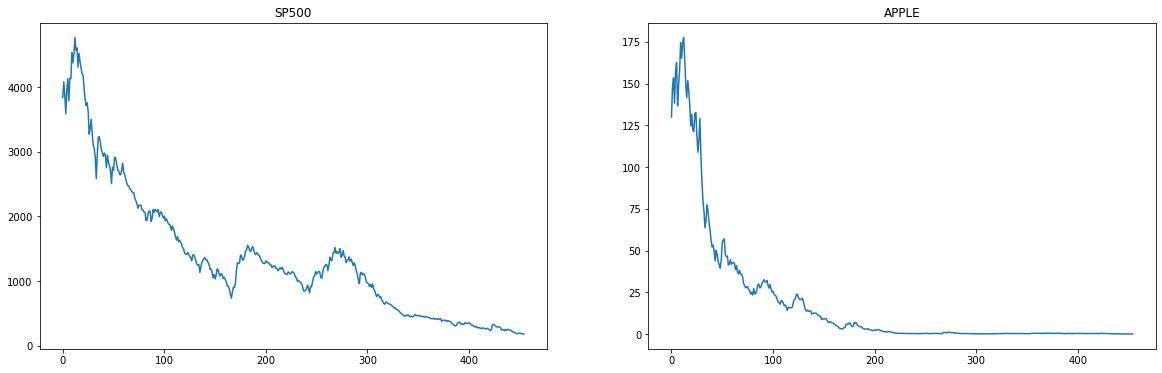

In [174]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.title('SP500')
graph_SP500 = df_reg['SP500']
fig4 = plt.gcf() #pour exporter la figure par la suite 
graph_SP500.plot()

plt.subplot(1,2,2)
plt.title('APPLE')
graph_Apple = df_reg['Apple2']
fig5 = plt.gcf()
graph_Apple.plot()

Interprétation : De la même manière, les graphiques du SP500 et Apple sont similaires. il existerait donc une forte corrélation entre les deux variables.
On peut également noter qu'il existe une relation négative entre les indices boursiers Apple et SP500, avec le Treasury Yield et Federal Funds Rate.
Par contre, on ne remarque pas tout de suite la relation qu'il pourrait y avoir entre inflation et indice boursier Apple

In [175]:
#exporter les graphiques
fig4.savefig("Graph4.png", dpi=300)
fig5.savefig("Graph5.png", dpi=300)

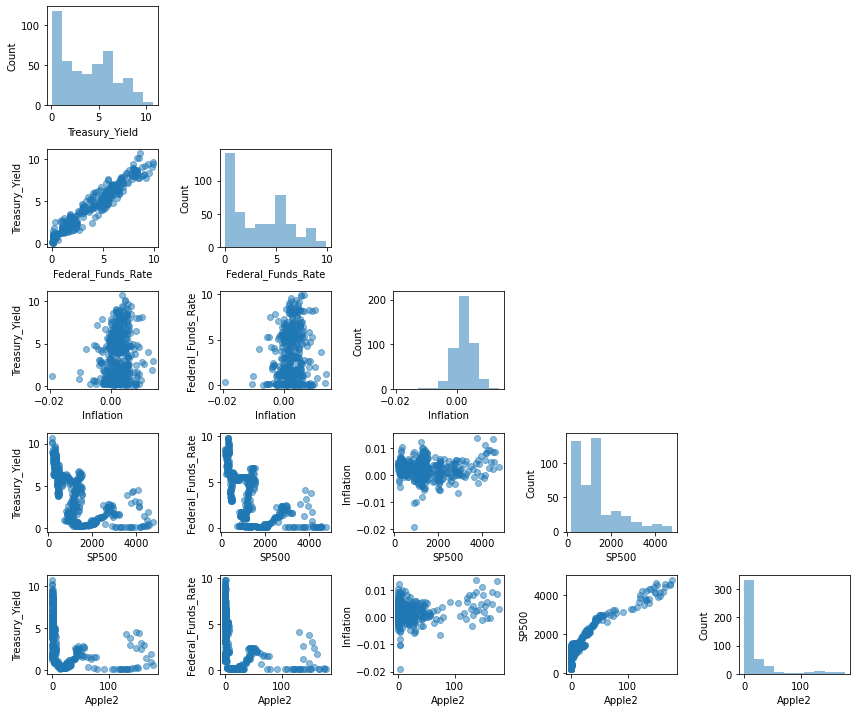

In [176]:
#Relations entre les variables du dataframe

#pip install mlxtend

cols = ['Treasury_Yield', 'Federal_Funds_Rate', 'Inflation', 'SP500', 'Apple2']

scatterplotmatrix(df_reg[cols].values, figsize=(12, 10), names=cols, alpha=0.5)
plt.tight_layout()
fig6 = plt.gcf() #pour exporter la figure par la suite
plt.show()

In [177]:
#exporter le graphique
fig6.savefig("Graph6.png", dpi=300)

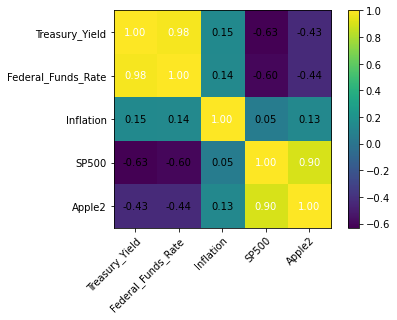

In [178]:
#Matrice de corrélation

cm = np.corrcoef(df_reg[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
matrice_corr = plt.gcf() #pour exporter la matrice de corrélation
plt.show()

Interprétation : Cela ne fait pas forcément sens d'utiliser l'inflation pour expliquer l'indice boursier Apple car la 
la corrélation est très faible entre les 2 variables. On verra par la suite si l'ajout de l'inflation est réellement utile pour prédire l'indice boursier Apple. Sinon, on peut trouver une corrélation très positive et proche de 1 entre Apple et SP500. On remarque une corrélation négative entre Apple et le Treasury Yied + Federal Funds Rate (relation inverse entre taux d'intérêt et indices boursiers).

In [179]:
#exporter la matrice de corrélation
matrice_corr.savefig("Matrice_Corrélation.png", dpi=300)

### <u>2) Classification<u>

#### 2.1) Dataframe équilibré/déséquilibré ?

In [180]:
df_clas['Apple'].value_counts()

1.0    255
0.0    200
Name: Apple, dtype: int64

<Figure size 432x288 with 0 Axes>

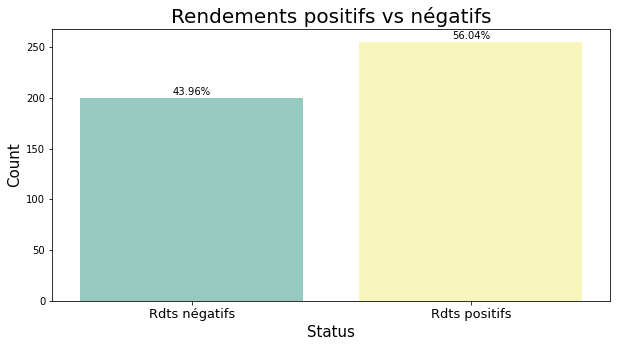

In [181]:
fig7 = plt.gcf() #pour exporter le graphique
plt.figure(figsize = (10,5))
ax = sns.countplot(df_clas['Apple'], palette='Set3')

ax.set_title('Rendements positifs vs négatifs',fontsize = 20)
ax.set_xlabel('Status',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Rdts négatifs','Rdts positifs'],fontsize = 13)

# adding percentage to the top of each bar
total = float(len(df_clas))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center") 

Il y a donc dans le dataframe 255 rendements positifs (56,04%) et 200 rendements négatifs (43,96%), donc pas besoin de faire un rééquilibrage du dataframe.

In [182]:
#exporter le graphique
fig7.savefig("Graph7.png", dpi=300)

#### 2.2) Séparation des features et label

In [183]:
#On sépare les variables explicatives et la variable expliquée

labels = np.array(df_clas.Apple)
features = np.array(df_clas[['Treasury_Yield','Federal_Funds_Rate', 'Inflation', 'SP500']])

#### 2.3) Séparation du dataframe en échantillon train / test

In [184]:
#On sépare le dataframe en échantillon train et test

train_features_clas, test_features_clas, train_labels_clas, test_labels_clas = train_test_split(
    features, labels, test_size = 0.25, random_state = 110)

#### 2.4) Modèles de classification

##### 2.4.1) Avec la variable inflation

##### Modèle KNN

In [185]:
#Entrainement du modèle sur échantillon train

knn = KNeighborsClassifier(n_neighbors=14,weights='distance',n_jobs=12)
scaler = StandardScaler() 
scaler.fit(train_features_clas) #pour standardiser les variables explicatives
knn.fit(scaler.transform(train_features_clas), train_labels_clas)

y_predict_train = knn.predict(train_features_clas)
print('Global accuracy with training sample - KNN: ',accuracy_score(train_labels_clas,y_predict_train))

Global accuracy with training sample - KNN:  0.5483870967741935


In [186]:
#Prédiction avec échantillon test

y_predict_test = knn.predict(scaler.transform(test_features_clas))
print('Global accuracy with testing sample - KNN: ',accuracy_score(test_labels_clas,y_predict_test))

Global accuracy with testing sample - KNN:  0.5614035087719298


In [187]:
# Optimisation de l'hyperparamètre n_neighbors par la cross validation

neighbors = [x for x in range(1,50)]
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,scaler.transform(train_features_clas), train_labels_clas, cv=5) 
    cv_scores.append(scores.mean())

In [188]:
print('Le nombre de voisins optimal est : ', neighbors[np.array(cv_scores).argmax()])

Le nombre de voisins optimal est :  3


In [189]:
#Lancement du KNN après optimisation de l'hyperparamètre (3) :

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(scaler.transform(train_features_clas),train_labels_clas)
y_predict_train=knn.predict(train_features_clas)
y_predict_test=knn.predict(scaler.transform(test_features_clas))
print('Global accuracy with training sample - KNN: ',accuracy_score(train_labels_clas, y_predict_train, normalize=True))
print('Global accuracy with testing sample - KNN: ',accuracy_score(test_labels_clas, y_predict_test, normalize=True))

Global accuracy with training sample - KNN:  0.5483870967741935
Global accuracy with testing sample - KNN:  0.5701754385964912


In [190]:
#Matrice de confusion :

cross_tab_out = pd.crosstab(test_labels_clas,y_predict_test).values

a = cross_tab_out[0,0]
b = cross_tab_out[0,1]
c = cross_tab_out[1,0]
d = cross_tab_out[1,1]

print('Out-sample good classification for negativ return - KNN: ',round(a/(a+b)*100,2),'%')
print('Out-sample good classification for positiv return - KNN: ',round(d/(c+d)*100,2),'%')


pd.crosstab(test_labels_clas,y_predict_test)

Out-sample good classification for negativ return - KNN:  41.3 %
Out-sample good classification for positiv return - KNN:  67.65 %


col_0,0.0,1.0
row_0,,
0.0,19,27
1.0,22,46


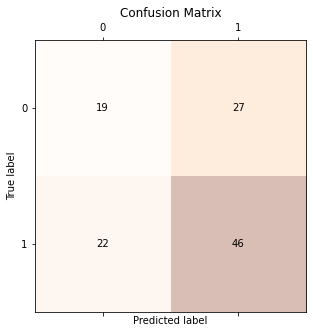

In [191]:
conf_matrix = confusion_matrix(test_labels_clas, y_predict_test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
matrice_confusion1 = plt.gcf() #pour exporter la matrice de confusion
plt.show()

In [192]:
#exporter la matrice de confusion
matrice_confusion1.savefig("Matrice_Confusion1.png", dpi=300)

##### Forêt aléatoire

In [193]:
#Entrainement du modèle sur échantillon train :

rf = RandomForestClassifier(criterion='gini',n_estimators=5, random_state=1,n_jobs=1)
scaler.fit(train_features_clas)
rf.fit(scaler.transform(train_features_clas), train_labels_clas)

y_predict_train = rf.predict(train_features_clas)
print('Global accuracy with training sample - Random Forest: ',accuracy_score(train_labels_clas,y_predict_train))

Global accuracy with training sample - Random Forest:  0.4574780058651026


In [194]:
#Résultat de la prédiction :
y_predict_test = rf.predict(test_features_clas)
print('Global accuracy with testing sample - Random Forest: ',accuracy_score(test_labels_clas,y_predict_test))

Global accuracy with testing sample - Random Forest:  0.38596491228070173


In [195]:
# optimisation de l'hyperparamètre par la cross validation :

estimators = [x for x in range(1,50)]
cv_scores = []
for k in estimators:
    rf = RandomForestClassifier(criterion='gini',n_estimators=k,random_state=1,n_jobs=1)
    scores = cross_val_score(rf,scaler.transform(train_features_clas), train_labels_clas, cv=5) 
    cv_scores.append(scores.mean())

In [196]:
print('L estimateur optimal est : ', estimators[np.array(cv_scores).argmax()])

L estimateur optimal est :  37


In [197]:
#Changement de l'hyperparamètre en prenant l'hyperparamètre optimal (37) :

rf = RandomForestClassifier(criterion='gini',n_estimators=37, random_state=1,n_jobs=1)
scaler.fit(train_features_clas)
rf.fit(scaler.transform(train_features_clas), train_labels_clas)
y_predict_train = rf.predict(train_features_clas)
y_predict_test = rf.predict(test_features_clas)
print('Global accuracy with training sample - Random Forest: ',accuracy_score(train_labels_clas, y_predict_train, normalize=True))
print('Global accuracy with testing sample - Random Forest: ',accuracy_score(test_labels_clas, y_predict_test, normalize=True))

Global accuracy with training sample - Random Forest:  0.44574780058651026
Global accuracy with testing sample - Random Forest:  0.39473684210526316


In [198]:
#Matrice de confusion : 

cross_tab_out = pd.crosstab(test_labels_clas,y_predict_test).values

a = cross_tab_out[0,0]
b = cross_tab_out[0,1]
c = cross_tab_out[1,0]
d = cross_tab_out[1,1]

print('Out-sample good classification for negativ return - Random Forest: ',round(a/(a+b)*100,2),'%')
print('Out-sample good classification for positiv return - Random Forest: ',round(d/(c+d)*100,2),'%')


pd.crosstab(test_labels_clas,y_predict_test)

Out-sample good classification for negativ return - Random Forest:  95.65 %
Out-sample good classification for positiv return - Random Forest:  1.47 %


col_0,0.0,1.0
row_0,,
0.0,44,2
1.0,67,1


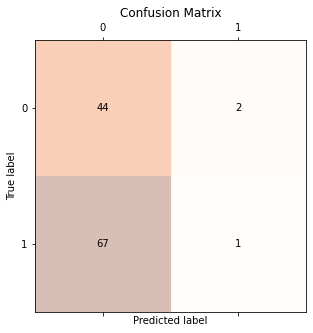

In [199]:
conf_matrix = confusion_matrix(test_labels_clas, y_predict_test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
matrice_confusion2 = plt.gcf() #pour exporter la matrice de confusion
plt.show()

In [200]:
#exporter la matrice de confusion
matrice_confusion2.savefig("Matrice_Confusion2.png", dpi=300)

##### Modèle Naive Bayes

In [201]:
gnb = GaussianNB()
gnb.fit(train_features_clas, train_labels_clas)
y_predict_train=gnb.predict(train_features_clas)
y_predict_test=gnb.predict(test_features_clas)
print('Global accuracy with training sample - Naive Bayes : ' , round(accuracy_score(train_labels_clas, y_predict_train, normalize=True),3))
print('Global accuracy with testing sample - Naive Bayes : ' , round(accuracy_score(test_labels_clas, y_predict_test, normalize=True),3))

Global accuracy with training sample - Naive Bayes :  0.554
Global accuracy with testing sample - Naive Bayes :  0.509


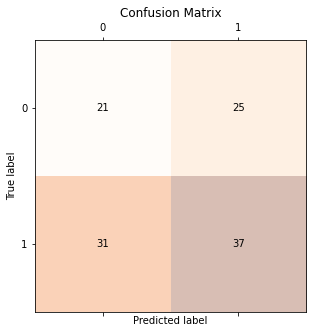

In [202]:
conf_matrix = confusion_matrix(test_labels_clas, y_predict_test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
matrice_confusion3 = plt.gcf() #pour exporter la matrice de confusion
plt.show()

In [203]:
#exporter la matrice de confusion
matrice_confusion3.savefig("Matrice_Confusion3.png", dpi=300)

##### SVM

In [204]:
#Entrainement du modèle sur échantillon train :

SVM = SVC(C = 1, random_state = 1, kernel = 'linear')
scaler.fit(train_features_clas)
SVM.fit(scaler.transform(train_features_clas), train_labels_clas)

y_predict_train = SVM.predict(train_features_clas)
print('Global accuracy with training sample - SVM: ',accuracy_score(train_labels_clas, y_predict_train, normalize=True))

Global accuracy with training sample - SVM:  0.5483870967741935


In [205]:
#Prédiction du modèle :

y_predict_test = SVM.predict(test_features_clas)
print('Global accuracy with testing sample - SVM: ',accuracy_score(test_labels_clas,y_predict_test))

Global accuracy with testing sample - SVM:  0.5964912280701754


In [206]:
# optimisation de l'hyperparamètre par la cross validation :

C = [x for x in np.linspace(0.01,2,20)]
cv_scores=[]
for c in C:
    model = SVC(C=c, random_state=1, kernel='linear')
    scores = cross_val_score(model,scaler.transform(train_features_clas), train_labels_clas, cv=5) 
    cv_scores.append(scores.mean())

In [207]:
print('L hyperparamètre optimal est : ', C[np.array(cv_scores).argmax()])

L hyperparamètre optimal est :  0.01


In [208]:
#Changement de l'hyperparamètre en prenant l'hyperparamètre optimal (0.01) :

SVM = SVC(C = 0.01, random_state = 1, kernel = 'linear')
scaler.fit(train_features_clas)
SVM.fit(scaler.transform(train_features_clas), train_labels_clas)
y_predict_train = SVM.predict(train_features_clas)
print('Global accuracy with training sample - SVM: ',accuracy_score(train_labels_clas,y_predict_train))

Global accuracy with training sample - SVM:  0.5483870967741935


In [209]:
#Prédiction avec hyperparamètre optimal :

y_predict_test = SVM.predict(test_features_clas)
print('Global accuracy with testing sample - SVM: ',accuracy_score(test_labels_clas,y_predict_test))

Global accuracy with testing sample - SVM:  0.5964912280701754


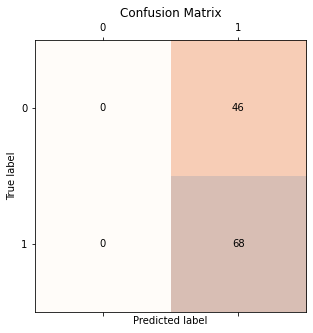

In [210]:
conf_matrix = confusion_matrix(test_labels_clas, y_predict_test)

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center')
 
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
matrice_confusion4 = plt.gcf() #pour exporter la matrice de confusion
plt.show()

In [211]:
#exporter la matrice de confusion
matrice_confusion3.savefig("Matrice_Confusion3.png", dpi=300)

##### 2.4.2) Sans la variable inflation

##### Modèle KNN

In [212]:
#On sépare label et features (en ne prenant pas en compte l'inflation cette fois-ci)

labels_2 = np.array(df_clas.Apple)
features_2 = np.array(df_clas[['Treasury_Yield','Federal_Funds_Rate', 'SP500']])

In [213]:
#On sépare de nouveau le dataframe en échantillon train et test

train_features_2, test_features_2, train_labels_2, test_labels_2 = train_test_split(
    features_2, labels_2, test_size = 0.25, random_state = 111)

In [214]:
#Entrainement du modèle :

knn = KNeighborsClassifier(n_neighbors=14,weights='distance',n_jobs=12)
scaler.fit(train_features_2)
knn.fit(scaler.transform(train_features_2), train_labels_2)

KNeighborsClassifier(n_jobs=12, n_neighbors=14, weights='distance')

In [215]:
#Prédiction :
y_predict_test_2 = knn.predict(test_features_2)
accuracy_score(test_labels_2,y_predict_test_2)

0.4298245614035088

In [216]:
#Optimisation de l'hyperparamètre

neighbors = [x for x in range(1,50)]
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,scaler.transform(train_features_2), train_labels_2, cv=5) 
    cv_scores.append(scores.mean())

In [217]:
print('Le nombre de voisins optimal est : ', neighbors[np.array(cv_scores).argmax()])

Le nombre de voisins optimal est :  20


In [218]:
#Prédiction optimisée :

knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(scaler.transform(train_features_2),train_labels_2)
y_predict_test_2=knn.predict(scaler.transform(test_features_2))
print('Global accuracy - KNN: ',accuracy_score(test_labels_2, y_predict_test_2, normalize=True))

Global accuracy - KNN:  0.5964912280701754


##### Random Forest

In [219]:
#Entrainement du modèle :

rf = RandomForestClassifier(criterion='gini',n_estimators=5, random_state=1,n_jobs=1)
scaler.fit(train_features_2)
rf.fit(scaler.transform(train_features_2), train_labels_2)

RandomForestClassifier(n_estimators=5, n_jobs=1, random_state=1)

In [220]:
#Résultat de la prédiction

y_predict_test_2 = rf.predict(test_features_2)
accuracy_score(test_labels_2,y_predict_test_2)

0.4298245614035088

In [221]:
# optimisation de l'hyperparamètre n_neighbors par la cross validation
estimators = [x for x in range(1,50)]
cv_scores = []
for k in estimators:
    rf = RandomForestClassifier(criterion='gini',n_estimators=k,random_state=1,n_jobs=1)
    scores = cross_val_score(rf,scaler.transform(train_features_2), train_labels_2, cv=5) 
    cv_scores.append(scores.mean())

In [222]:
print('L estimateur optimal est : ', estimators[np.array(cv_scores).argmax()])

L estimateur optimal est :  1


In [223]:
#Changement de l'hyperparamètre en prenant l'hyperparamètre optimal (1) :
rf = RandomForestClassifier(criterion='gini',n_estimators=1, random_state=1,n_jobs=1)
scaler.fit(train_features_2)
rf.fit(scaler.transform(train_features_2), train_labels_2)

y_predict_test_2 = rf.predict(test_features_2)
print('Global accuracy - Random Forest: ',accuracy_score(test_labels_2, y_predict_test_2, normalize=True))

Global accuracy - Random Forest:  0.4298245614035088


##### Naive Bayes

In [224]:
gnb = GaussianNB()
gnb.fit(train_features_2, train_labels_2)
y_predict_test_2=gnb.predict(test_features_2)
print('Global accuracy - Naive Bayes : ' , round(accuracy_score(test_labels_2, y_predict_test_2, normalize=True),3))

Global accuracy - Naive Bayes :  0.544


##### SVM

In [225]:
#Entrainement du modèle :

SVM = SVC(C = 1, random_state = 1, kernel = 'linear')
scaler.fit(train_features_2)
SVM.fit(scaler.transform(train_features_2), train_labels_2)

SVC(C=1, kernel='linear', random_state=1)

In [226]:
#Prédiction :

y_predict_test_2 = SVM.predict(test_features_2)
accuracy_score(test_labels_2,y_predict_test_2)

0.5526315789473685

In [227]:
#Optimisation de l'hyperparamètre :

C = [x for x in np.linspace(0.01,2,20)]
cv_scores=[]
for c in C:
    model = SVC(C=c, random_state=1, kernel='linear')
    scores = cross_val_score(model,scaler.transform(train_features_2), train_labels_2, cv=5) 
    cv_scores.append(scores.mean())

In [228]:
print('L hyperparamètre optimal est : ', C[np.array(cv_scores).argmax()])

L hyperparamètre optimal est :  0.01


In [229]:
#Prédiction optimisée :

SVM = SVC(C = 0.01, random_state = 1, kernel = 'linear')
scaler.fit(train_features_2)
SVM.fit(scaler.transform(train_features_2), train_labels_2)

y_predict_test_2 = SVM.predict(test_features_2)
accuracy_score(test_labels_2,y_predict_test_2)

0.5701754385964912

### <u>3) Régression<u>

#### 3.1) Séparation label et features

In [230]:
#On sépare les variables explicatives et la variable expliquée

labels_reg = np.array(df_reg.Apple2)
features_reg = np.array(df_reg[['Treasury_Yield','Federal_Funds_Rate', 'Inflation', 'SP500']])

#### 3.2) Séparation du dataframe en échantillon train / test

In [231]:
train_features_reg, test_features_reg, train_labels_reg, test_labels_reg = train_test_split(
    features_reg, labels_reg, test_size = 0.25, random_state = 42)

#### 3.3) Modèles de régression

##### Lasso

In [232]:
lasso = Lasso(alpha=0.1)

lasso.fit(train_features_reg, train_labels_reg)

y_train_pred = lasso.predict(train_features_reg)

y_test_pred = lasso.predict(test_features_reg)

print(lasso.coef_)


print('MSE train: %.3f, test: %.3f' % (

        mean_absolute_percentage_error(train_labels_reg, y_train_pred),

        mean_absolute_percentage_error(test_labels_reg, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (

        r2_score(train_labels_reg, y_train_pred),

        r2_score(test_labels_reg, y_test_pred)))

[ 9.76919845 -7.04073504  0.          0.03701008]
MSE train: 18.182, test: 18.252
R^2 train: 0.846, test: 0.875


In [233]:
#optimisation de l'hyperparamètre par la cross validation

alpha= [x for x in np.linspace(0.1,5,20)]
cv_scores = []
for c in alpha:
    lasso = Lasso(alpha=c)
    scores = cross_val_score(lasso,train_features_reg, train_labels_reg, cv=5) # cross validation
    cv_scores.append(scores.mean())

In [244]:
print('L hyperparamètre optimal (alpha) est : ', alpha[np.array(cv_scores).argmax()])

L hyperparamètre optimal (alpha) est :  0.1


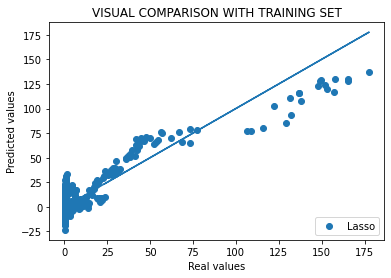

In [235]:
plt.scatter(train_labels_reg, y_train_pred, label = 'Lasso')
plt.plot(train_labels_reg,train_labels_reg)
plt.title('VISUAL COMPARISON WITH TRAINING SET')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.legend(loc='lower right')
fig8 = plt.gcf() #pour exporter le graphique
plt.show()

In [236]:
#exporter le graphique
fig8.savefig("Graph8.png", dpi=300)

In [237]:
def plot_errors(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="test")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [238]:
def evaluate_model(Model, lambdas):
    training_errors = [] # we will store the error on the training set, for using each different lambda
    testing_errors = [] # and the error on the testing set
    for l in lambdas:
        model = Model(alpha=l, max_iter=1000) # we allow max number of iterations until the model converges
        model.fit(train_features_reg, train_labels_reg)

        training_predictions = model.predict(train_features_reg)
        training_mse = mean_squared_error(train_labels_reg, training_predictions)
        training_errors.append(training_mse)

        testing_predictions = model.predict(test_features_reg)
        testing_mse = mean_squared_error(test_labels_reg, testing_predictions)
        testing_errors.append(testing_mse)
    return training_errors, testing_errors

<Figure size 432x288 with 0 Axes>

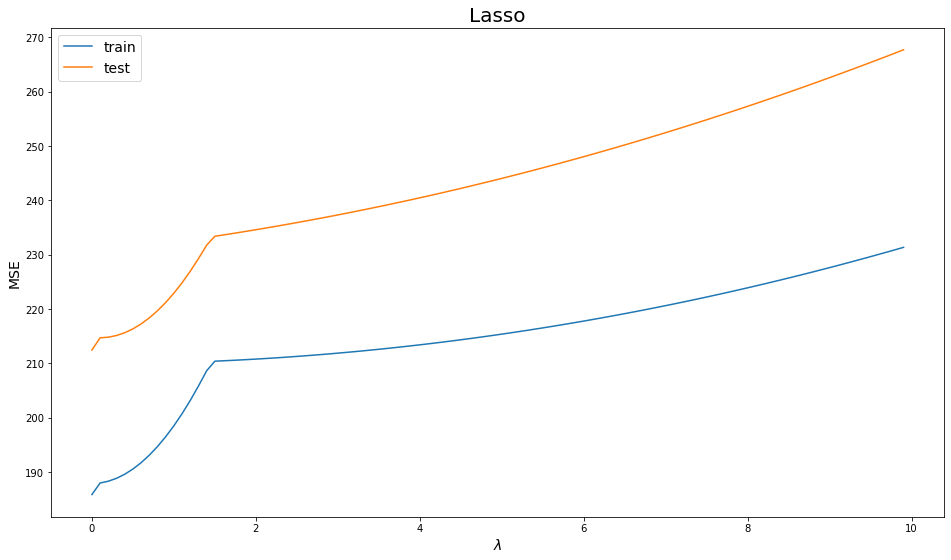

In [239]:
import warnings
warnings.filterwarnings('ignore')
# let's generate different values for lambda from 0 (no-regularization) and 10 (too much regularization)
lambdas = np.arange(0, 10, step=0.1)

lasso_train, lasso_test = evaluate_model(Lasso, lambdas)
fig9 = plt.gcf() #pour exporter le graphique
plot_errors(lambdas, lasso_train, lasso_test, "Lasso")

In [240]:
#exporter le graphique
fig9.savefig("Graph9.png", dpi=300)

##### Random Forest

In [241]:
randomForest = RandomForestRegressor(max_depth = 15, min_samples_leaf = 5, min_samples_split = 10, n_estimators = 150)

randomForest.fit(train_features_reg, train_labels_reg)

y_train_pred = randomForest.predict(train_features_reg)

y_test_pred = randomForest.predict(test_features_reg)


print('MSE train: %.3f, test: %.3f' % (

        mean_absolute_percentage_error(train_labels_reg, y_train_pred),

        mean_absolute_percentage_error(test_labels_reg, y_test_pred)))

print('R^2 train: %.3f, test: %.3f' % (

        r2_score(train_labels_reg, y_train_pred),

        r2_score(test_labels_reg, y_test_pred)))

MSE train: 0.242, test: 0.290
R^2 train: 0.991, test: 0.978


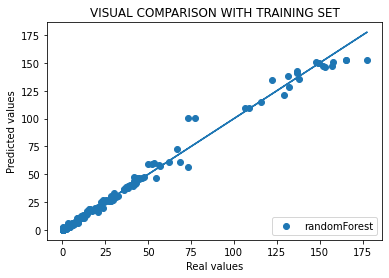

In [242]:
plt.scatter(train_labels_reg, y_train_pred, label = 'randomForest')
plt.plot(train_labels_reg,train_labels_reg)
plt.title('VISUAL COMPARISON WITH TRAINING SET')
plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.legend(loc='lower right')
fig10 = plt.gcf() #pour exporter le graphique
plt.show()

In [243]:
#exporter le graphique
fig10.savefig("Graph10.png", dpi=300)